In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [99]:
def calculateMeanValidValues(X : list) -> float:
    mean : float = 0
    n : float = 0

    for i in np.arange(len(X)):
        
        if X[i] <= 0:
            print("X[i]: " + str(X[i]))
            print("i: " + str(i))
            raise ValueError('Data has negative numbers')

        mean += X[i]
            
        n += 1

    return mean / n

In [100]:
def calculateValidVarianza(X : list)-> float:
    deviation : float = 0
    n : float =0

    x_mean : float = calculateMeanValidValues(X)

    for i in np.arange(len(X)):

        if X[i] <= 0:
            print("X[i]: " + str(X[i]))
            print("i: " + str(i))
            raise ValueError('Data has negative numbers')

        n += 1
            
        deviation += np.power(X[i] - x_mean, 2)
    
    return deviation / n

In [101]:
def calculateDeviationWithValidValues(X : list)-> float:    
    return np.sqrt(calculateValidVarianza(X))

In [102]:
def calulateUncertainty(X : list) -> float:
    return calculateDeviationWithValidValues(X) / np.sqrt(len(X));

In [103]:
def getMeanTimeData(problem, mutationType, algorithm, rotation) -> float:
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/t.csv",sep=" ",header=None), dtype=np.int64))
    return calculateMeanValidValues(data)/60000
def getMeanFitnessData(problem, mutationType, algorithm, rotation) -> float:
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/"+algorithm+".csv",sep=" ",header=None), dtype=np.float32))
    return calculateMeanValidValues(data)

def getDeviationTimeData(problem, mutationType, algorithm, rotation) -> float:
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/t.csv",sep=" ",header=None), dtype=np.int64))
    return calculateDeviationWithValidValues(data)/60000
def getDeviationFitnessData(problem, mutationType, algorithm, rotation) -> float:
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/"+algorithm+".csv",sep=" ",header=None), dtype=np.float32))
    return calculateDeviationWithValidValues(data)

def getUncertaintyFitnessData(problem, mutationType, algorithm, rotation) -> float:
    data = np.squeeze(np.asarray(pd.read_csv("Results/"+problem+"/"+mutationType+"/"+algorithm+"/"+rotation+"/"+algorithm+".csv",sep=" ",header=None), dtype=np.float32))
    return calulateUncertainty(data)

def getDeviationProblem1(algorithm, mutation):
    return getDeviationFitnessData("P1A2", mutation, algorithm, "SIX")
def getDeviationProblem2(algorithm, mutation):
    return getDeviationFitnessData("P2A2", mutation, algorithm, "SIX")
def getDeviationProblem3(algorithm, mutation):
    return getDeviationFitnessData("P3A2", mutation, algorithm, "SIX")
def getDeviationProblem4(algorithm, mutation):
    return getDeviationFitnessData("P4A2", mutation, algorithm, "SIX")
def getDeviationProblem5(algorithm, mutation):
    return getDeviationFitnessData("P5A2", mutation, algorithm, "SIX")

def getProblem1(algorithm, mutation):
    return getMeanFitnessData("P1A2", mutation, algorithm, "SIX")
def getProblem2(algorithm, mutation):
    return getMeanFitnessData("P2A2", mutation, algorithm, "SIX")
def getProblem3(algorithm, mutation):
    return getMeanFitnessData("P3A2", mutation, algorithm, "SIX")
def getProblem4(algorithm, mutation):
    return getMeanFitnessData("P4A2", mutation, algorithm, "SIX")
def getProblem5(algorithm, mutation):
    return getMeanFitnessData("P5A2", mutation, algorithm, "SIX")

def getProblem1Time(algorithm, mutation):
    return getMeanTimeData("P1A2", mutation, algorithm, "SIX")
def getProblem2Time(algorithm, mutation):
    return getMeanTimeData("P2A2", mutation, algorithm, "SIX")
def getProblem3Time(algorithm, mutation):
    return getMeanTimeData("P3A2", mutation, algorithm, "SIX")
def getProblem4Time(algorithm, mutation):
    return getMeanTimeData("P4A2", mutation, algorithm, "SIX")
def getProblem5Time(algorithm, mutation):
    return getMeanTimeData("P5A2", mutation, algorithm, "SIX")


buildeDeviationProblemData = lambda algorithm,rotation : np.array([getDeviationProblem1(algorithm, rotation), getDeviationProblem2(algorithm, rotation),getDeviationProblem3(algorithm, rotation),getDeviationProblem4(algorithm, rotation),getDeviationProblem5(algorithm, rotation)])

buildProblemData = lambda algorithm,rotation : np.array([getProblem1(algorithm, rotation), getProblem2(algorithm, rotation),getProblem3(algorithm, rotation),getProblem4(algorithm, rotation),getProblem5(algorithm, rotation)])
buildProblemTimeData = lambda algorithm,rotation : np.array([getProblem1Time(algorithm, rotation), getProblem2Time(algorithm, rotation),getProblem3Time(algorithm, rotation),getProblem4Time(algorithm, rotation),getProblem5Time(algorithm, rotation)])


In [104]:
def plotAlgorthmResults(isTime : bool= False):
    x = np.array([16, 25, 52, 100, 151])

    if(not isTime):
        algoritms = ['GA', 'ABC','FFA']
    else:
        algoritms = ['GA_t', 'ABC_t','FFA_t']

    fig,ax = plt.subplot_mosaic([algoritms], figsize=(7*3, 3.5*3))

    for algorithm in algoritms:         

        y1 = buildProblemData(algorithm, "InverseMutation")
        y2 = buildProblemData(algorithm, "C1Mutation")
        y3 = buildProblemData(algorithm, "C2Mutation")

        if(not isTime):
            y1_err = buildeDeviationProblemData(algorithm, "InverseMutation")
            y2_err = buildeDeviationProblemData(algorithm, "C1Mutation")
            y3_err = buildeDeviationProblemData(algorithm, "C2Mutation")

            ax[algorithm].errorbar(x, y1, y1_err, elinewidth = 1, capsize=10)
            ax[algorithm].errorbar(x, y2, y2_err, elinewidth = 1, capsize=10)
            ax[algorithm].errorbar(x, y3, y3_err, elinewidth = 1, capsize=10)
        else:
            t1 = buildProblemTimeData(algorithm, "InverseMutation")
            t2 = buildProblemTimeData(algorithm, "C1Mutation")
            t3 = buildProblemTimeData(algorithm, "C2Mutation")

        
        ax[algorithm].set(xlabel='Number of items', ylabel='Fitness')
        ax[algorithm].set_title(algorithm)
        
        ax[algorithm].scatter(x, y1, label="Inverse Mutation")
        ax[algorithm].scatter(x, y2, label="C1 Mutation")
        ax[algorithm].scatter(x, y3, label="C2 Mutation")

        ax[algorithm].plot(x, y1)
        ax[algorithm].plot(x, y2)
        ax[algorithm].plot(x, y3)
        ax[algorithm].grid()

        ax[algorithm].legend()


    ax["GA"].sharey(ax["ABC"])
    ax["FFA"].sharey(ax["ABC"])
    
    fig.suptitle('6-Rotation - Original Algorithms')
    plt.show()



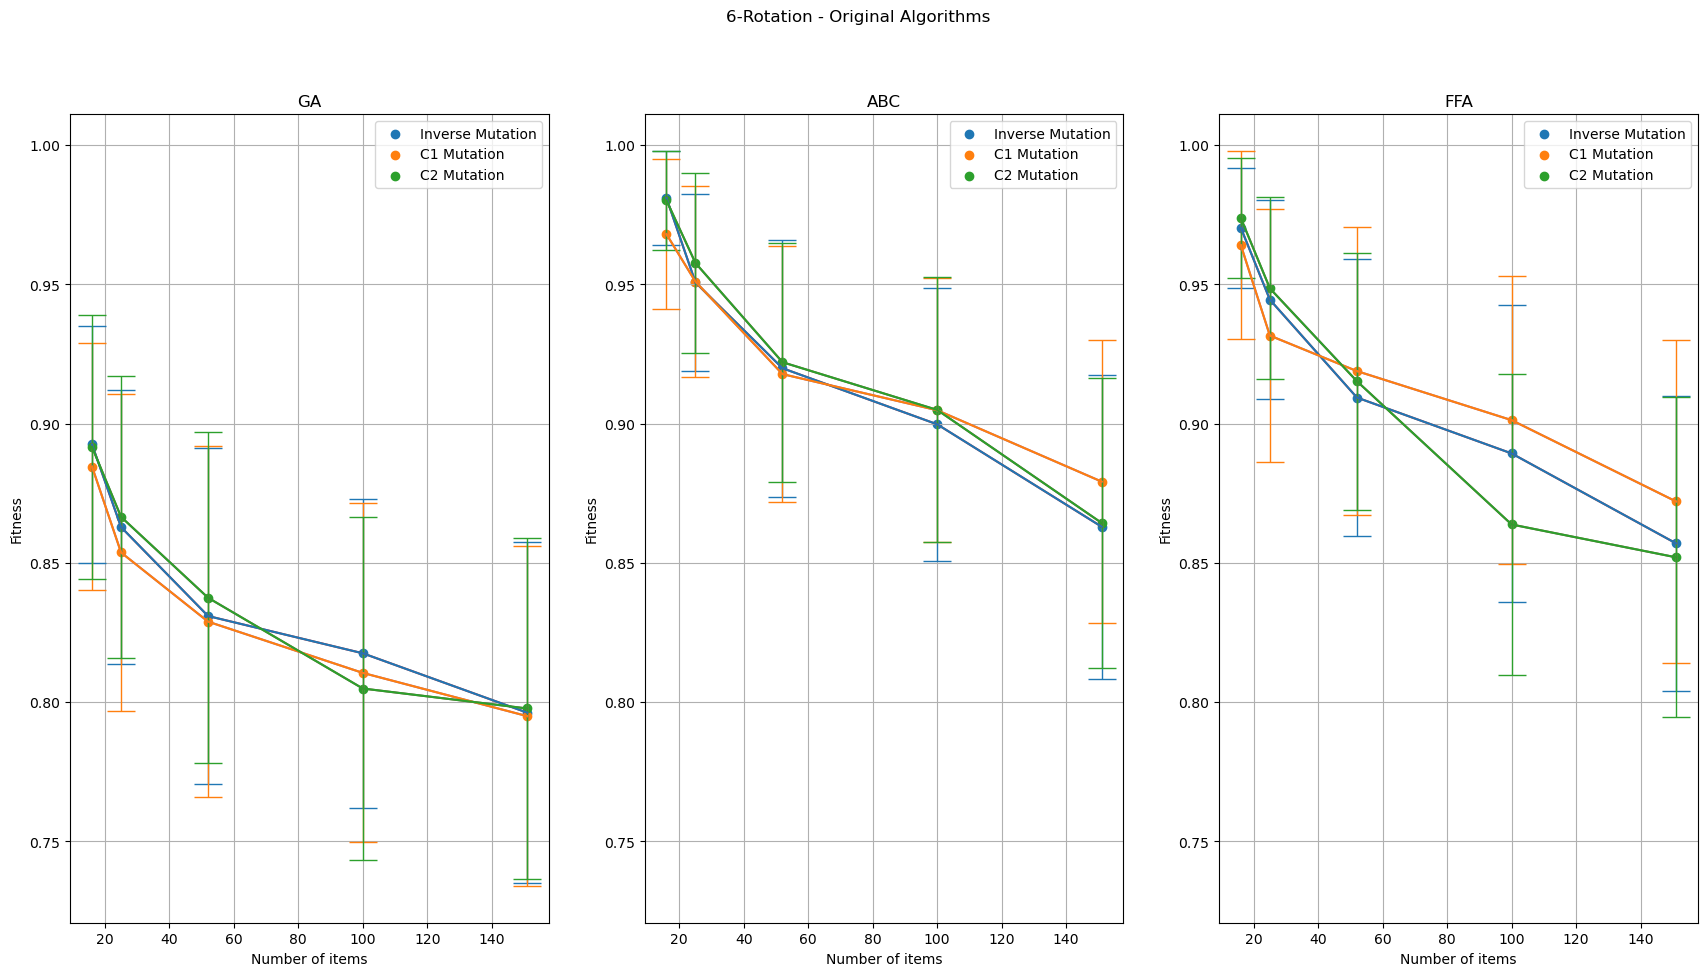

In [105]:
plotAlgorthmResults()

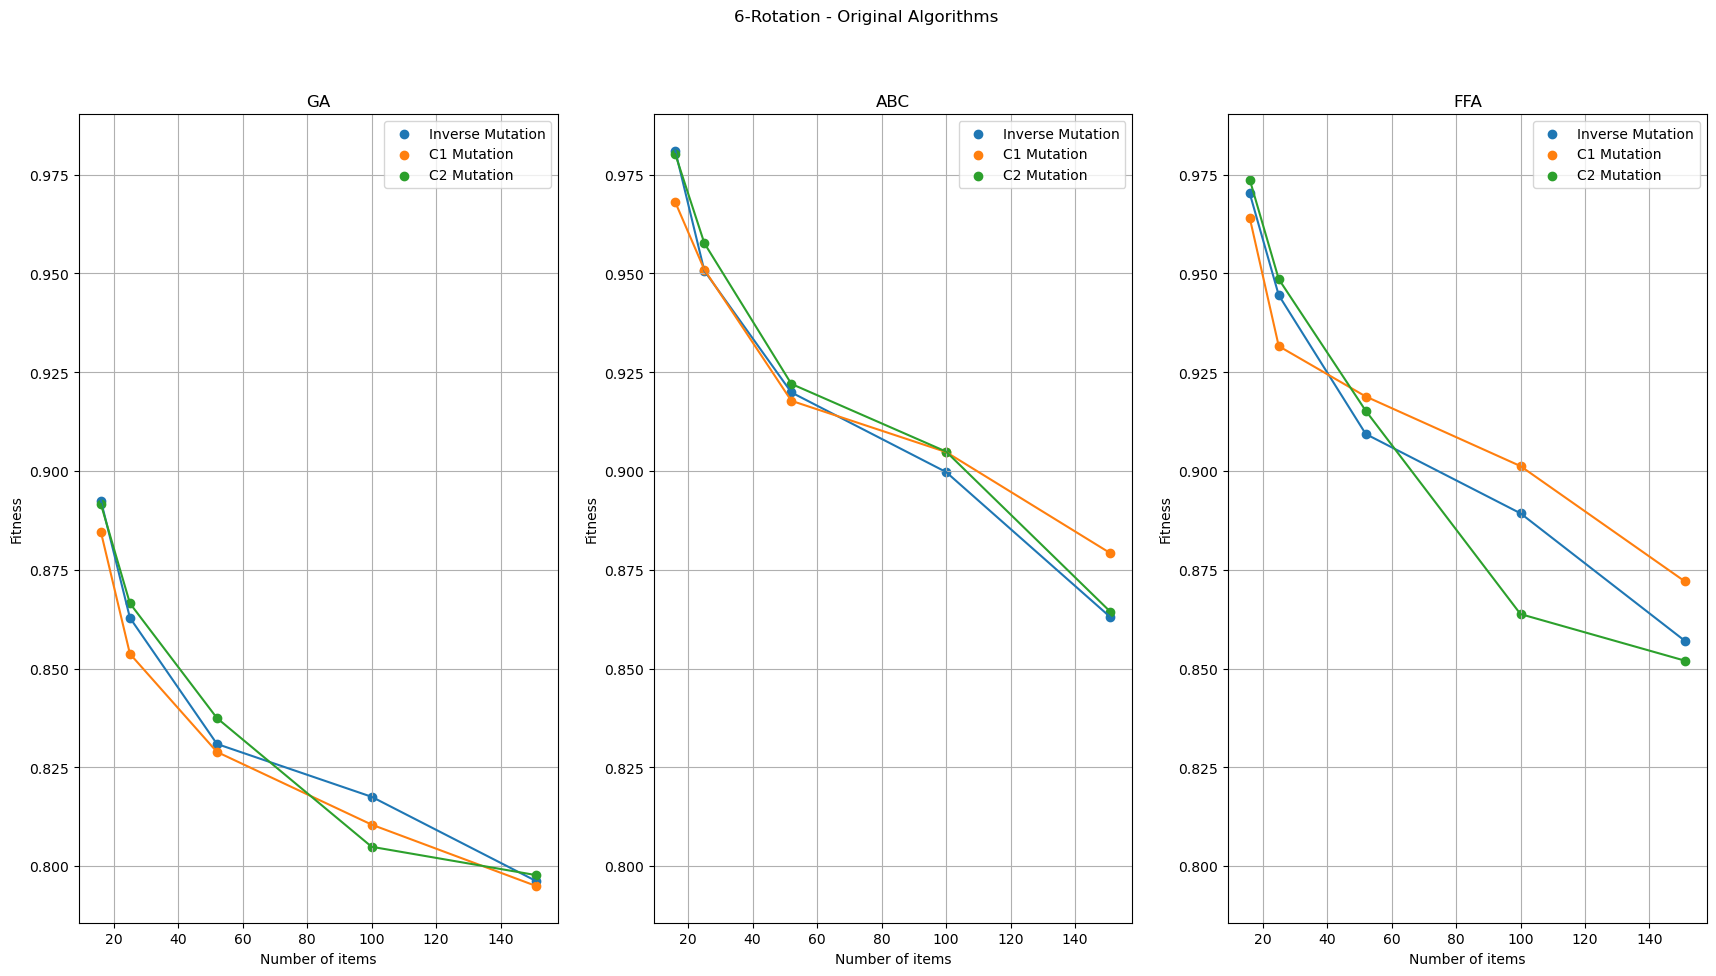

In [106]:
plotAlgorthmResults(True)